In [1]:
import os
os.chdir('..')

import functools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from glob import glob

from lib import *

%matplotlib inline

d:\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [2]:
import tensorflow as tf
import tensorflow.contrib as tfcontrib
from tensorflow.python.keras import layers
from tensorflow.python.keras import losses
from tensorflow.python.keras import models
from tensorflow.python.keras import backend as K

In [3]:
def get_images_filenames(x_path, y_path):
    images_p = os.listdir(x_path)
    images = []
    masks = []
    for image_p in images_p:
        name = image_p.split('.')[0]
        images.append(f'{x_path}/{name}.jpg')
        masks.append(f'{y_path}/{name}.png')
    return images, masks

In [4]:
x_path = 'data/data/train'
y_path = 'data/data/train_mask'
x_train_filenames, y_train_filenames = get_images_filenames(x_path, y_path)

In [5]:
x_path = 'data/data/valid'
y_path = 'data/data/valid_mask'
x_valid_filenames, y_valid_filenames = get_images_filenames(x_path, y_path)

In [6]:
num_train_examples = len(x_train_filenames)
num_val_examples = len(x_valid_filenames)

print("Number of training examples: {}".format(num_train_examples))
print("Number of validation examples: {}".format(num_val_examples))

Number of training examples: 1315
Number of validation examples: 145


In [7]:
import matplotlib.image as mpimg

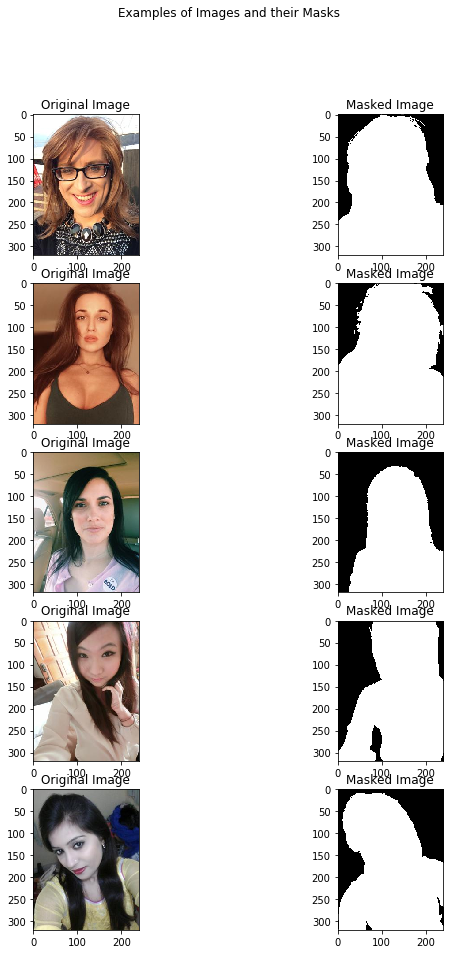

In [8]:
display_num = 5

r_choices = np.random.choice(num_train_examples, display_num)

plt.figure(figsize=(10, 15))
for i in range(0, display_num * 2, 2):
  img_num = r_choices[i // 2]
  x_pathname = x_train_filenames[img_num]
  y_pathname = y_train_filenames[img_num]
  
  plt.subplot(display_num, 2, i + 1)
  plt.imshow(mpimg.imread(x_pathname))
  plt.title("Original Image")
  
  example_labels = Image.open(y_pathname)
  label_vals = np.unique(example_labels)
  
  plt.subplot(display_num, 2, i + 2)
  plt.imshow(example_labels)
  plt.title("Masked Image")  
  
plt.suptitle("Examples of Images and their Masks")
plt.show()

In [9]:
image_augmentation

<module 'lib.image_augmentation' from 'D:\\Data\\Projects\\InternshipTestTask\\human_segmentation\\lib\\image_augmentation.py'>

In [10]:
def _process_pathnames(fname, label_path):
  # We map this function onto each pathname pair  
  img_str = tf.read_file(fname)
  img = tf.image.decode_jpeg(img_str, channels=3)

  label_img_str = tf.read_file(label_path)
  label_img = tf.image.decode_png(label_img_str)
  # The label image should only have values of 1 or 0, indicating pixel wise
  # object (car) or not (background). We take the first channel only. 
  #label_img = label_img[:, :, 0]
  #label_img = tf.expand_dims(label_img, axis=-1)
  return img, label_img

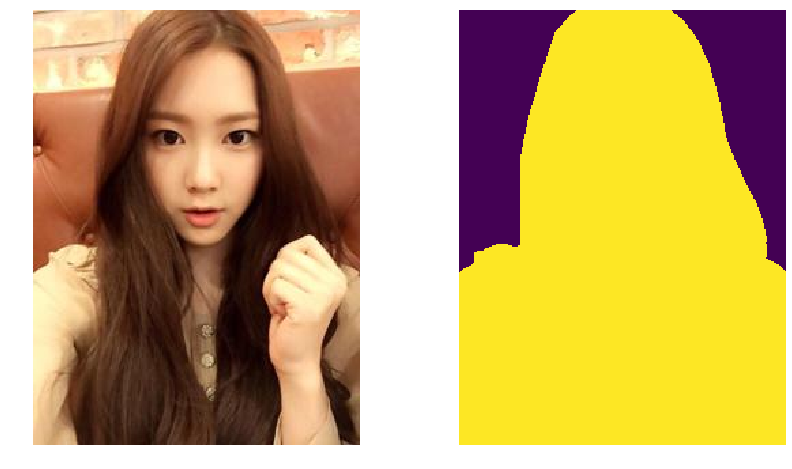

In [11]:
i = 15
img = np.array(Image.open(x_train_filenames[i]))
mask = np.array(Image.open(y_train_filenames[i]))
show_img_with_mask(img, mask)

In [12]:
with tf.Session() as sess:
    x, y = _process_pathnames(x_train_filenames[i], y_train_filenames[i])
    print(x, y)
    x, y = image_augmentation.flip_img(True, x, y)
    x1 = x.eval(session=sess)
    y1 = y.eval(session=sess)

Tensor("DecodeJpeg:0", shape=(?, ?, 3), dtype=uint8) Tensor("DecodePng:0", shape=(?, ?, ?), dtype=uint8)


In [13]:
type(x1)

numpy.ndarray

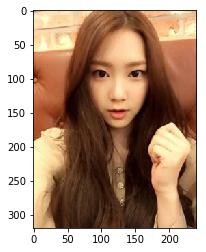

In [14]:
plt.imshow(x1)

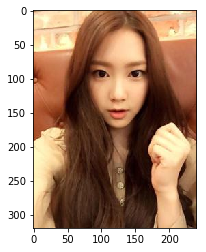

In [15]:
plt.imshow(img)

In [16]:
y1.shape

(320, 240, 1)

In [17]:
y1.shape

(320, 240, 1)

In [18]:
y2 = np.zeros((y1.shape[0], y1.shape[1], y1.shape[2] + 2))

In [19]:
y2.shape

(320, 240, 3)

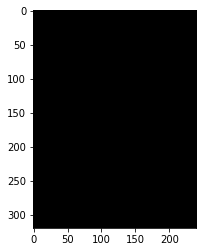

In [20]:
plt.imshow(y2)

In [21]:
y2[:,:,:-1] = y1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


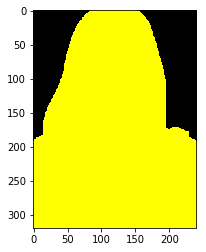

In [22]:
plt.imshow(y2)

In [12]:
def shift_img(output_img, label_img, shift_range_pxls=(0, 0)):
    """This fn will perform the horizontal or vertical shift"""
    if shift_range_pxls:
        width_shift_range = tf.random.uniform(
            [],
            -shift_range_pxls[1],
            shift_range_pxls[1],
        )
        height_shift_range = tf.random.uniform(
            [],
            -shift_range_pxls[0],
            shift_range_pxls[0],
        )
        # Translate both
        output_img = tfcontrib.image.translate(
            output_img,
            [width_shift_range, height_shift_range],
        )
        label_img = tfcontrib.image.translate(
            label_img,
            [width_shift_range, height_shift_range],
        )
    return output_img, label_img

In [13]:
with tf.Session() as sess:
    x, y = _process_pathnames(x_train_filenames[i], y_train_filenames[i])
    print(type(x.shape[0]))
    x, y = shift_img(x, y, (100, 100))
    x1 = x.eval(session=sess)
    y1 = y.eval(session=sess)

<class 'tensorflow.python.framework.tensor_shape.Dimension'>


In [16]:
type(y)

tensorflow.python.framework.ops.Tensor

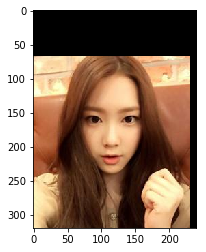

In [14]:
plt.imshow(x1)

In [73]:
def rotate_img(output_img, label_img, angle_rad_range):
    if angle_rad_range:
        angle_rad = tf.random.uniform([], -angle_rad_range, angle_rad_range)
        output_img = tf.contrib.image.rotate(output_img, angle_rad)
        label_img = tf.contrib.image.rotate(label_img, angle_rad)
    return output_img, label_img

In [90]:
with tf.Session() as sess:
    x, y = _process_pathnames(x_train_filenames[i], y_train_filenames[i])
    print(type(x.shape[0]))
    x, y = rotate_img(x, y, angle_rad_range=1.1)
    x1 = x.eval(session=sess)
    y1 = y.eval(session=sess)

<class 'tensorflow.python.framework.tensor_shape.Dimension'>


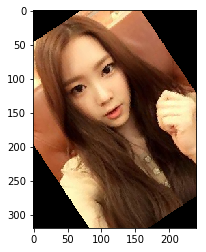

In [91]:
plt.imshow(x1)